## Пронаблюдаем характеристику графа в зависимости от различных параметров нормального распределения

  0%|          | 0/100 [00:00<?, ?it/s]

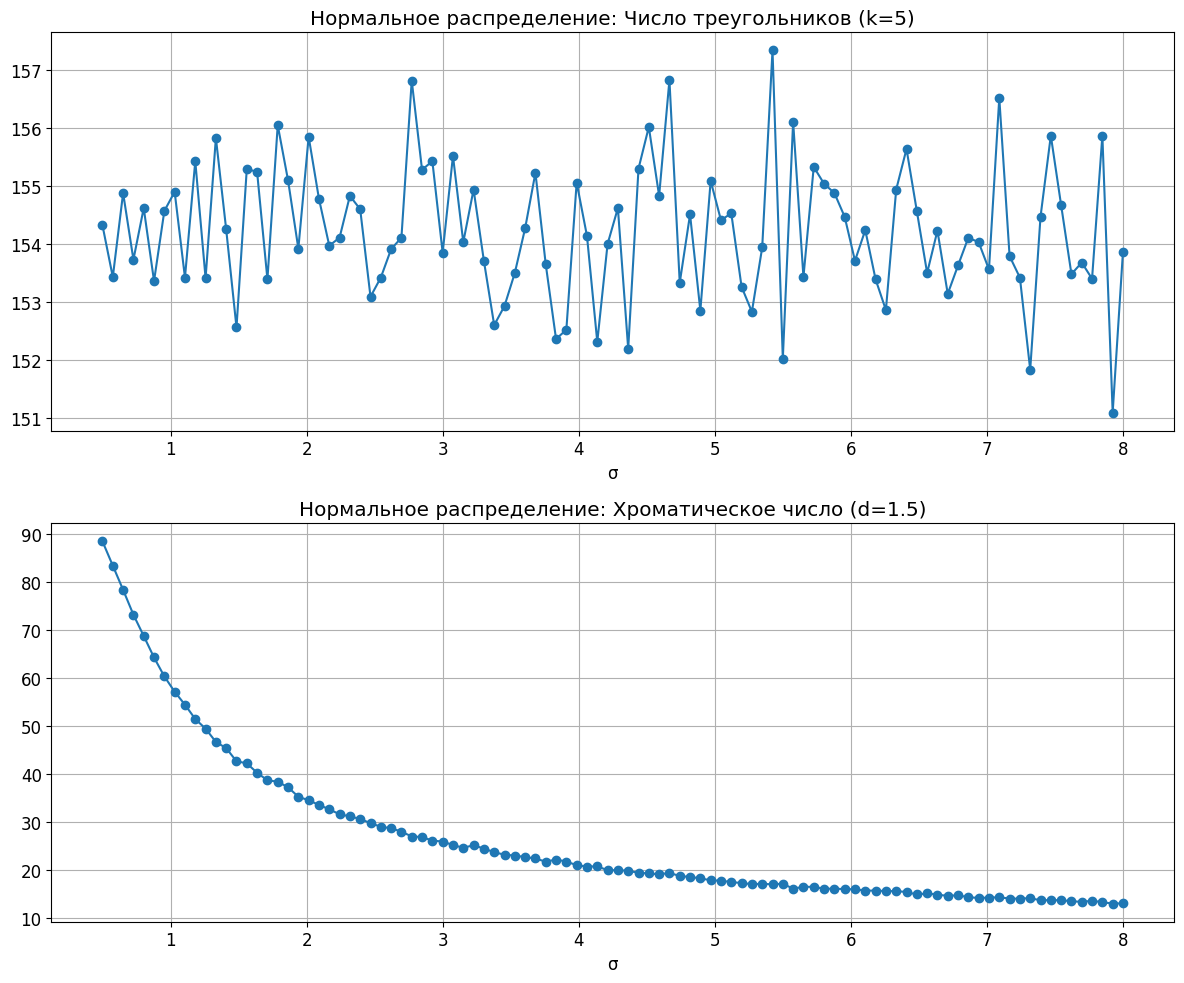

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from src.graph_builders import build_knn_graph, build_distance_graph
from src.features import compute_feature
from src.simulation import simulate_sample
from tqdm.notebook import tqdm

# Параметры
n = 100
simulations = 100
k = 5
d = 1.5

# Нормальное распределение: варьируем sigma
sigmas = np.linspace(0.5, 8, 100)

# Инициализация результатов
normal_triangles = []
normal_chromatic = []

# Для нормального распределения
for sigma in tqdm(sigmas):
    avg_tri = 0.0
    avg_chr = 0.0
    for _ in range(simulations):
        sample = simulate_sample(n, "normal", {"mu": 0, "sigma": sigma})
        
        # KNN-граф и число треугольников
        G_knn = build_knn_graph(sample, k)
        avg_tri += compute_feature(G_knn, "triangle_count")
        
        # Дистанционный граф и хроматическое число
        G_dist = build_distance_graph(sample, d)
        avg_chr += compute_feature(G_dist, "chromatic_number")
    
    normal_triangles.append(avg_tri / simulations)
    normal_chromatic.append(avg_chr / simulations)

# Построение графиков
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Нормальное распределение: число треугольников
axes[0].plot(sigmas, normal_triangles, marker='o')
axes[0].set_title("Нормальное распределение: Число треугольников (k=5)")
axes[0].set_xlabel("σ")
axes[0].grid(True)

# Нормальное распределение: хроматическое число
axes[1].plot(sigmas, normal_chromatic, marker='o')
axes[1].set_title("Нормальное распределение: Хроматическое число (d=1.5)")
axes[1].set_xlabel("σ")
axes[1].grid(True)

plt.tight_layout()
plt.show()

## Исследуем значение характеристик графа при изменении параметров распределения Лапласа

  0%|          | 0/100 [00:00<?, ?it/s]

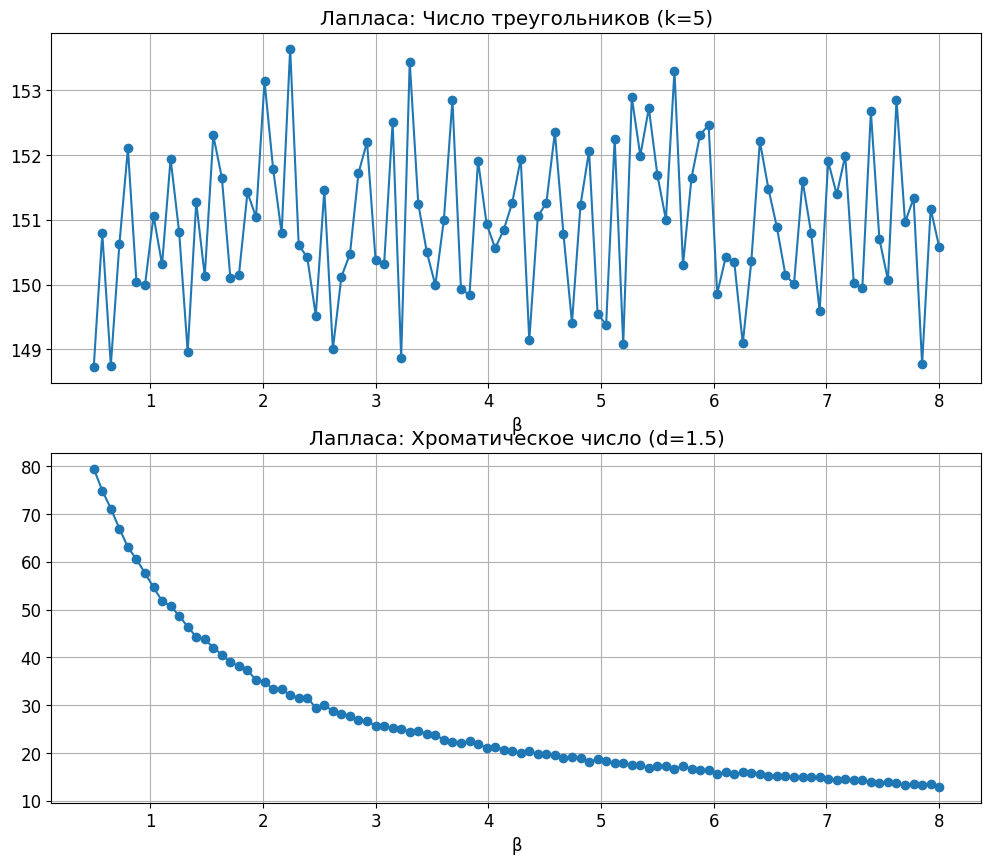

In [21]:
laplace_betas = np.linspace(0.5, 8, 100)

laplace_triangles = []
laplace_chromatic = []

# Для распределения Лапласа
for beta in tqdm(laplace_betas):
    avg_tri = 0.0
    avg_chr = 0.0
    for _ in range(simulations):
        sample = simulate_sample(n, "laplace", {"mu": 0, "beta": beta})
        
        G_knn = build_knn_graph(sample, k)
        avg_tri += compute_feature(G_knn, "triangle_count")
        
        G_dist = build_distance_graph(sample, d)
        avg_chr += compute_feature(G_dist, "chromatic_number")
    
    laplace_triangles.append(avg_tri / simulations)
    laplace_chromatic.append(avg_chr / simulations)


# Построение графиков
fig, axes = plt.subplots(2, 1, figsize=(12, 10))


# Лапласа: число треугольников
axes[0].plot(laplace_betas, laplace_triangles, marker='o')
axes[0].set_title("Лапласа: Число треугольников (k=5)")
axes[0].set_xlabel("β")
axes[0].grid(True)

# Лапласа: хроматическое число
axes[1].plot(laplace_betas, laplace_chromatic, marker='o')
axes[1].set_title("Лапласа: Хроматическое число (d=1.5)")
axes[1].set_xlabel("β")
axes[1].grid(True)

## Посмотрим на изменение значений характеристик графа при измененеии параметров процедуры построения графа

Размер выборки (KNN):   0%|          | 0/4 [00:00<?, ?it/s]

k-параметры:   0%|          | 0/20 [00:00<?, ?it/s]

k-параметры:   0%|          | 0/20 [00:00<?, ?it/s]

k-параметры:   0%|          | 0/20 [00:00<?, ?it/s]

k-параметры:   0%|          | 0/20 [00:00<?, ?it/s]

Размер выборки (Дистанционный):   0%|          | 0/4 [00:00<?, ?it/s]

d-параметры:   0%|          | 0/30 [00:00<?, ?it/s]

d-параметры:   0%|          | 0/30 [00:00<?, ?it/s]

d-параметры:   0%|          | 0/30 [00:00<?, ?it/s]

d-параметры:   0%|          | 0/30 [00:00<?, ?it/s]

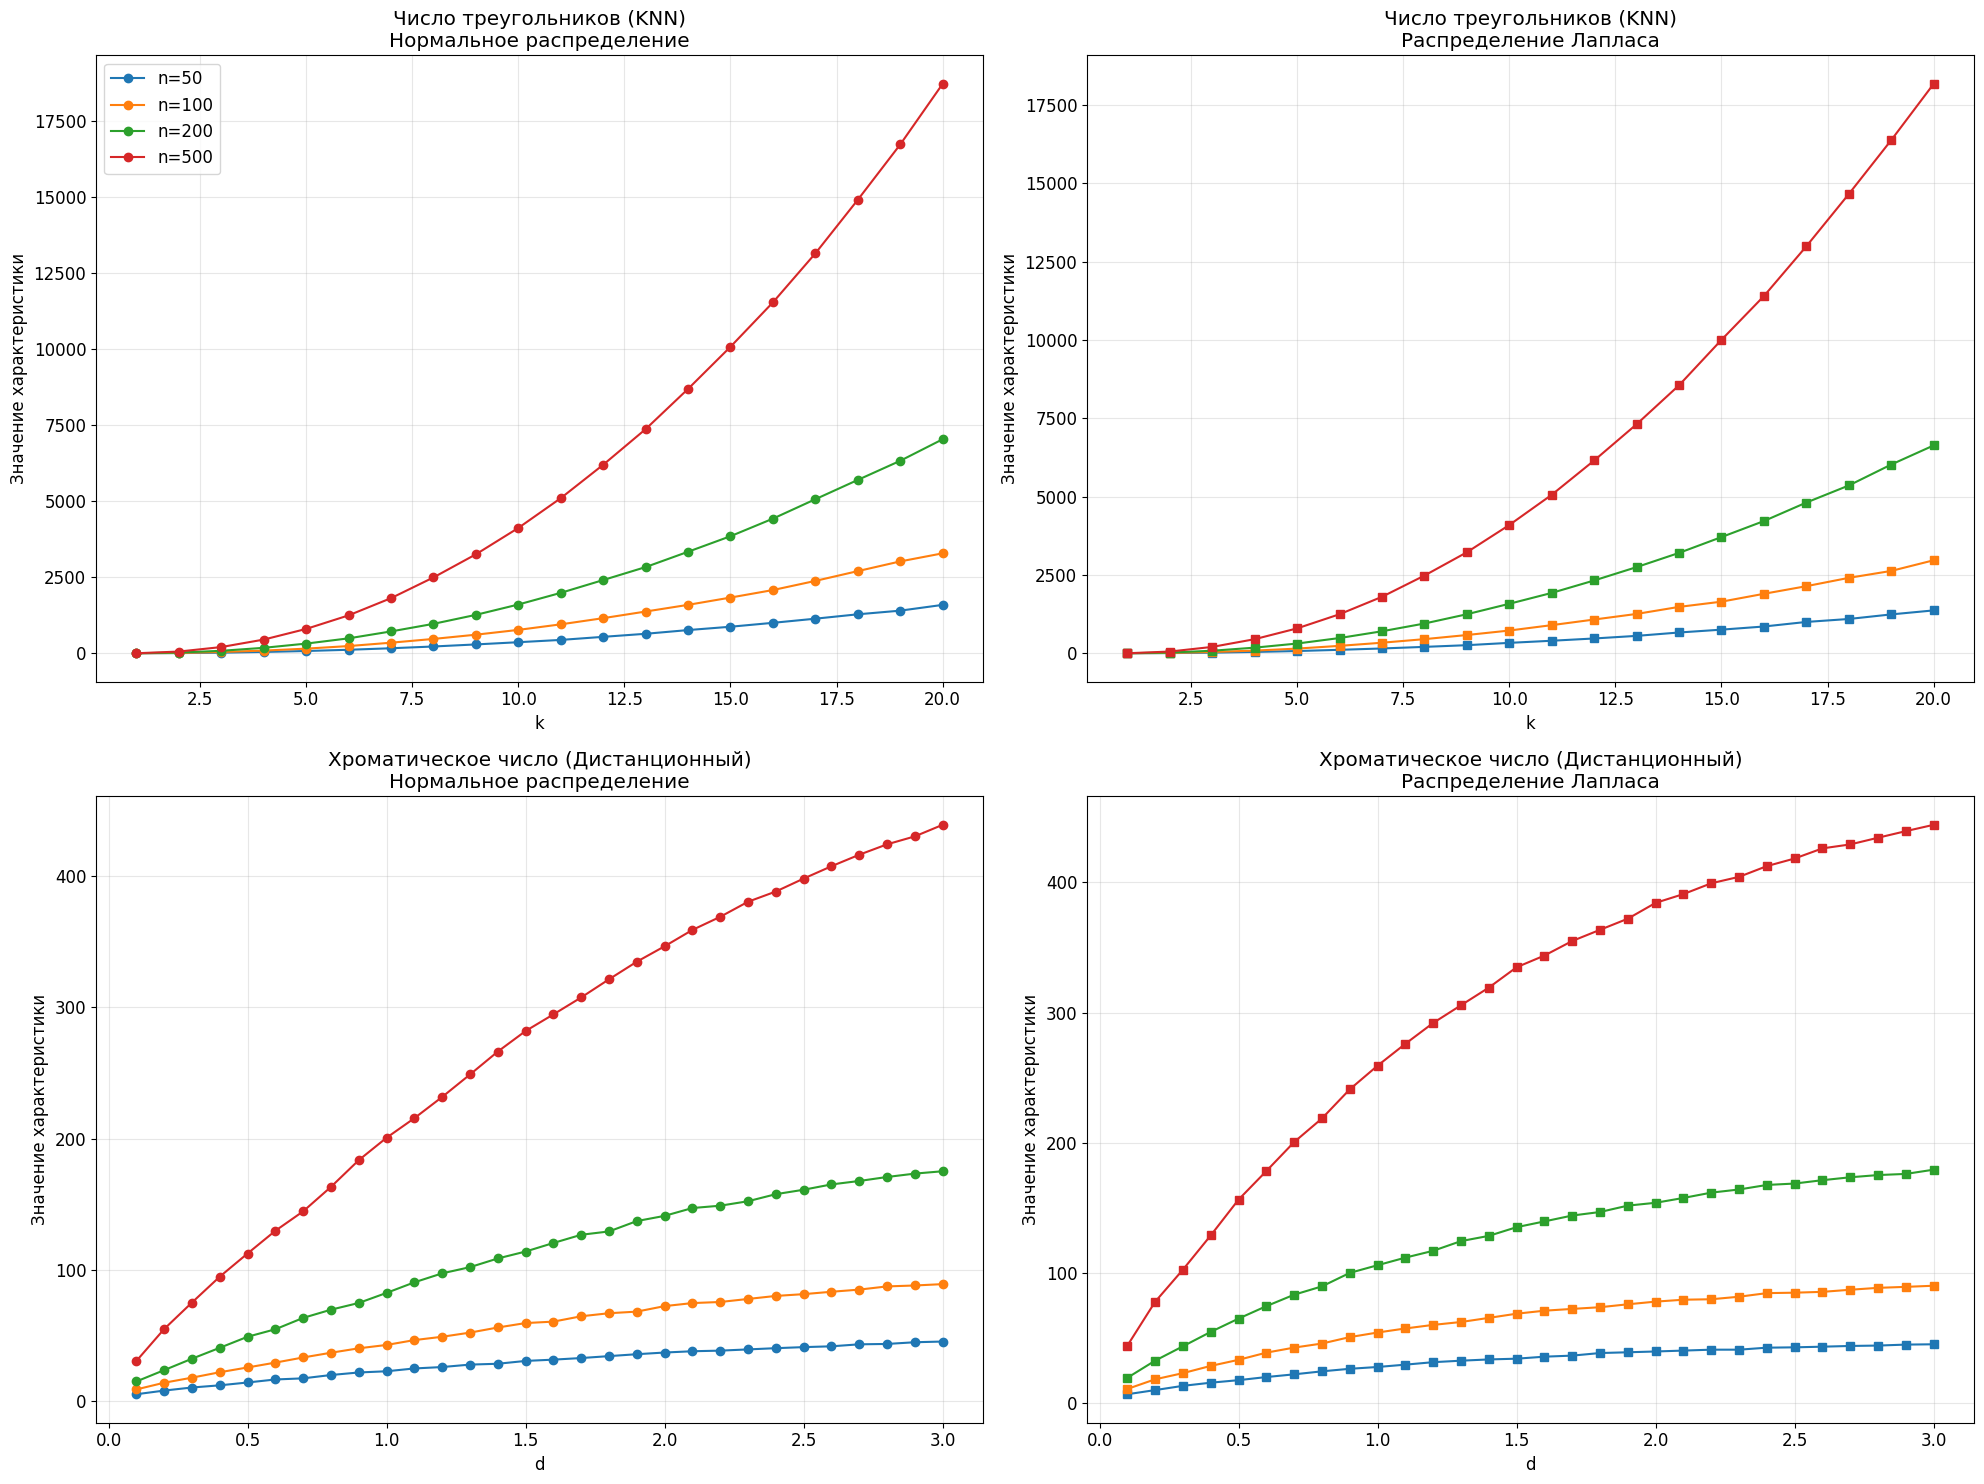

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from src.graph_builders import build_knn_graph, build_distance_graph
from src.features import compute_feature
from src.simulation import simulate_sample
from tqdm.notebook import tqdm

# Фиксированные параметры распределений
NORMAL_PARAMS = {"mu": 0, "sigma": 1.0}
LAPLACE_PARAMS = {"mu": 0, "beta": np.sqrt(1/2)}

# Диапазоны параметров графов и выборок
K_VALUES = np.arange(1, 21)          # k от 1 до 20
D_VALUES = np.linspace(0.1, 3.0, 30) # d от 0.1 до 3.0
N_VALUES = [50, 100, 200, 500]       # Размеры выборок
SIMULATIONS = 50                      # Число симуляций для усреднения

# Результаты для нормального распределения
normal_knn_results = {n: [] for n in N_VALUES}
normal_dist_results = {n: [] for n in N_VALUES}

# Результаты для распределения Лапласа
laplace_knn_results = {n: [] for n in N_VALUES}
laplace_dist_results = {n: [] for n in N_VALUES}

# Эксперимент для KNN-графа (число треугольников)
for n in tqdm(N_VALUES, desc="Размер выборки (KNN)"):
    for k in tqdm(K_VALUES, desc="k-параметры", leave=False):
        avg_tri = 0.0
        
        # Нормальное распределение
        for _ in range(SIMULATIONS):
            sample = simulate_sample(n, "normal", NORMAL_PARAMS)
            G = build_knn_graph(sample, int(k))
            avg_tri += compute_feature(G, "triangle_count")
        normal_knn_results[n].append(avg_tri / SIMULATIONS)
        
        # Распределение Лапласа
        avg_tri = 0.0
        for _ in range(SIMULATIONS):
            sample = simulate_sample(n, "laplace", LAPLACE_PARAMS)
            G = build_knn_graph(sample, int(k))
            avg_tri += compute_feature(G, "triangle_count")
        laplace_knn_results[n].append(avg_tri / SIMULATIONS)

# Эксперимент для дистанционного графа (хроматическое число)
for n in tqdm(N_VALUES, desc="Размер выборки (Дистанционный)"):
    for d in tqdm(D_VALUES, desc="d-параметры", leave=False):
        avg_chr = 0.0
        
        # Нормальное распределение
        for _ in range(SIMULATIONS):
            sample = simulate_sample(n, "normal", NORMAL_PARAMS)
            G = build_distance_graph(sample, d)
            avg_chr += compute_feature(G, "chromatic_number")
        normal_dist_results[n].append(avg_chr / SIMULATIONS)
        
        # Распределение Лапласа
        avg_chr = 0.0
        for _ in range(SIMULATIONS):
            sample = simulate_sample(n, "laplace", LAPLACE_PARAMS)
            G = build_distance_graph(sample, d)
            avg_chr += compute_feature(G, "chromatic_number")
        laplace_dist_results[n].append(avg_chr / SIMULATIONS)

# Визуализация результатов
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# KNN-граф: Нормальное распределение
for n in N_VALUES:
    axes[0,0].plot(K_VALUES, normal_knn_results[n], 'o-', label=f'n={n}')
axes[0,0].set_title("Число треугольников (KNN)\nНормальное распределение")
axes[0,0].set_xlabel("k")
axes[0,0].legend()

# KNN-граф: Лапласа
for n in N_VALUES:
    axes[0,1].plot(K_VALUES, laplace_knn_results[n], 's-', label=f'n={n}')
axes[0,1].set_title("Число треугольников (KNN)\nРаспределение Лапласа")
axes[0,1].set_xlabel("k")

# Дистанционный граф: Нормальное распределение
for n in N_VALUES:
    axes[1,0].plot(D_VALUES, normal_dist_results[n], 'o-', label=f'n={n}')
axes[1,0].set_title("Хроматическое число (Дистанционный)\nНормальное распределение")
axes[1,0].set_xlabel("d")

# Дистанционный граф: Лапласа
for n in N_VALUES:
    axes[1,1].plot(D_VALUES, laplace_dist_results[n], 's-', label=f'n={n}')
axes[1,1].set_title("Хроматическое число (Дистанционный)\nРаспределение Лапласа")
axes[1,1].set_xlabel("d")

# Общие настройки
for ax in axes.flat:
    ax.grid(True, alpha=0.3)
    ax.set_ylabel("Значение характеристики")

plt.tight_layout()
plt.show()